In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
df = pd.read_csv('./data/international_matches_original.csv')
df.info(verbose=True)
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23921 entries, 0 to 23920
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date                           23921 non-null  object 
 1   home_team                      23921 non-null  object 
 2   away_team                      23921 non-null  object 
 3   home_team_continent            23921 non-null  object 
 4   away_team_continent            23921 non-null  object 
 5   home_team_fifa_rank            23921 non-null  int64  
 6   away_team_fifa_rank            23921 non-null  int64  
 7   home_team_total_fifa_points    23921 non-null  int64  
 8   away_team_total_fifa_points    23921 non-null  int64  
 9   home_team_score                23921 non-null  int64  
 10  away_team_score                23921 non-null  int64  
 11  tournament                     23921 non-null  object 
 12  city                           23921 non-null 

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
# Identifying numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns
print('Numeric columns: ', numeric_cols)

# Identifying non-numeric columns
non_numeric_cols = df.select_dtypes(exclude=['number']).columns
print('Non numeric columns: ', non_numeric_cols)

Numeric columns:  Index(['home_team_fifa_rank', 'away_team_fifa_rank',
       'home_team_total_fifa_points', 'away_team_total_fifa_points',
       'home_team_score', 'away_team_score', 'home_team_goalkeeper_score',
       'away_team_goalkeeper_score', 'home_team_mean_defense_score',
       'home_team_mean_offense_score', 'home_team_mean_midfield_score',
       'away_team_mean_defense_score', 'away_team_mean_offense_score',
       'away_team_mean_midfield_score'],
      dtype='object')
Non numeric columns:  Index(['date', 'home_team', 'away_team', 'home_team_continent',
       'away_team_continent', 'tournament', 'city', 'country',
       'neutral_location', 'shoot_out', 'home_team_result'],
      dtype='object')


## Missing Data

In [54]:
# non-null count
df[non_numeric_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23921 entries, 0 to 23920
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   date                 23921 non-null  object
 1   home_team            23921 non-null  object
 2   away_team            23921 non-null  object
 3   home_team_continent  23921 non-null  object
 4   away_team_continent  23921 non-null  object
 5   tournament           23921 non-null  object
 6   city                 23921 non-null  object
 7   country              23921 non-null  object
 8   neutral_location     23921 non-null  bool  
 9   shoot_out            23921 non-null  object
 10  home_team_result     23921 non-null  object
dtypes: bool(1), object(10)
memory usage: 1.8+ MB


In [55]:
# columns and number of missing values
num_missing = df.isna().sum()
num_missing[:]

date                                 0
home_team                            0
away_team                            0
home_team_continent                  0
away_team_continent                  0
home_team_fifa_rank                  0
away_team_fifa_rank                  0
home_team_total_fifa_points          0
away_team_total_fifa_points          0
home_team_score                      0
away_team_score                      0
tournament                           0
city                                 0
country                              0
neutral_location                     0
shoot_out                            0
home_team_result                     0
home_team_goalkeeper_score       15542
away_team_goalkeeper_score       15826
home_team_mean_defense_score     16134
home_team_mean_offense_score     15411
home_team_mean_midfield_score    15759
away_team_mean_defense_score     16357
away_team_mean_offense_score     15609
away_team_mean_midfield_score    15942
dtype: int64

In [56]:
# percentage of missing values by columns
pct_missing = df.isna().mean()
# only the scores have missing value 
pct_missing[17:]

home_team_goalkeeper_score       0.649722
away_team_goalkeeper_score       0.661594
home_team_mean_defense_score     0.674470
home_team_mean_offense_score     0.644246
home_team_mean_midfield_score    0.658794
away_team_mean_defense_score     0.683792
away_team_mean_offense_score     0.652523
away_team_mean_midfield_score    0.666444
dtype: float64

<AxesSubplot: >

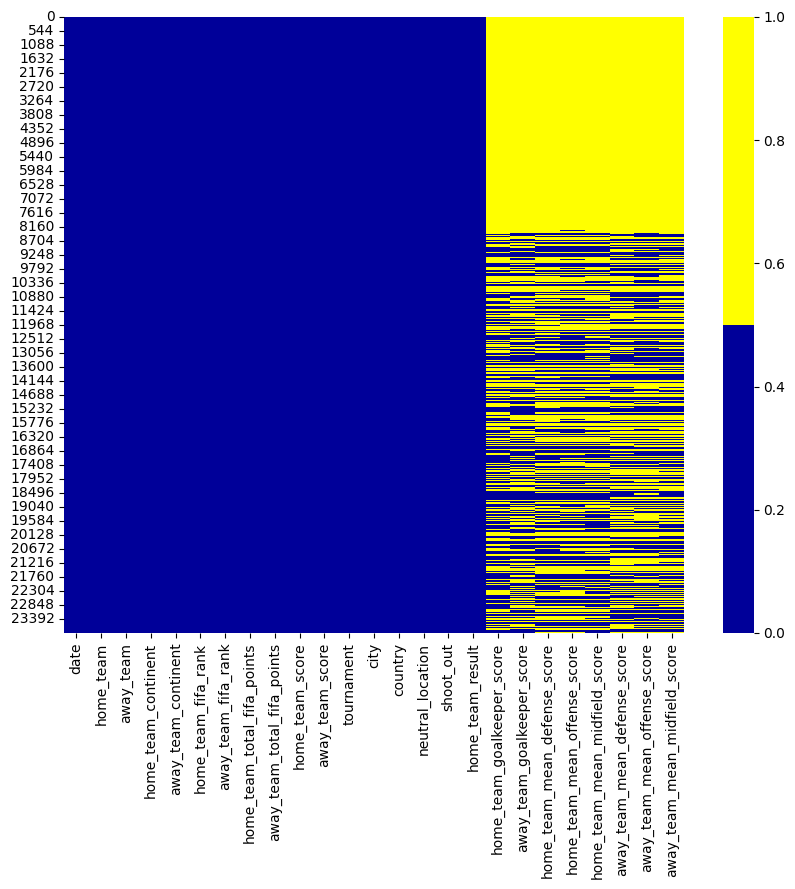

In [57]:
# Heatmap to visualize missing data
plt.figure(figsize=(10,8))

# first 30 columns
cols = df.columns[:30]
colours =['#000099', '#ffff00']
sns.heatmap(df[cols].isna(), cmap=sns.color_palette(colours))

### Insert match_id, some modifications

In [58]:
# insert match_id
df.insert(0,"match_id", df.index+1)
df = df.replace({'shoot_out':{'Yes': True, 'No': False}})
df['date'] = pd.to_datetime(df['date'])

In [59]:
df.head()

,match_id,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,...,False,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,...,False,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,...,False,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,...,False,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,...,False,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
df.to_csv('./data/international_matches.csv', index=False)

## Dropping the score columns

In [61]:
df_noscore = df.copy()

# drop last 8 columns
N = 8
df_noscore = df.iloc[: , :-N]

In [62]:
df_noscore.info()
df_noscore.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23921 entries, 0 to 23920
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   match_id                     23921 non-null  int64         
 1   date                         23921 non-null  datetime64[ns]
 2   home_team                    23921 non-null  object        
 3   away_team                    23921 non-null  object        
 4   home_team_continent          23921 non-null  object        
 5   away_team_continent          23921 non-null  object        
 6   home_team_fifa_rank          23921 non-null  int64         
 7   away_team_fifa_rank          23921 non-null  int64         
 8   home_team_total_fifa_points  23921 non-null  int64         
 9   away_team_total_fifa_points  23921 non-null  int64         
 10  home_team_score              23921 non-null  int64         
 11  away_team_score              23921 non-nu

,match_id,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score
count,23921.000000,23921.000000,23921.000000,23921.000000,23921.000000,23921.000000,23921.000000
mean,11961.000000,77.854688,80.797375,323.401488,315.453576,1.609214,1.068266
std,6905.542231,52.355225,53.232902,500.825725,490.944273,1.630127,1.263944
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,5981.000000,33.000000,36.000000,0.000000,0.000000,0.000000,0.000000
50%,11961.000000,71.000000,73.000000,0.000000,0.000000,1.000000,1.000000
75%,17941.000000,115.000000,119.000000,547.000000,523.000000,2.000000,2.000000
max,23921.000000,211.000000,211.000000,2164.000000,2164.000000,31.000000,21.000000


In [63]:
df_noscore.to_csv('./data/international_matches_no_team_scores.csv', index=False)